In [1]:
import konlpy
import pandas as pd
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data.csv")
df.head(10)

,Unnamed: 0,image_name,image_url,content,location,hashtags
0,0,육아_0.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,진짜 오랜만에 결이랑 머리한 기념으로 카페를 갔다. 원래 못가는거였는데 나를 잘 아...,NaN,#엄마랑아들#육아#육아맘#평택카페#평택맛집#육아스타그램#육아소통#아기가있는집#쥐띠아...
1,1,육아_1.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,"하린이에게 동생이 생겼어요 . . . 👶🏻❤️\n\n너무도 갑자기 찾아온 둘째라,\...",NaN,#둘째#임밍아웃#곧애둘엄마_실화냐#심쿵아#엄마아빠에게와주어고마워#자매맘#두딸맘#예비...
2,2,육아_2.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,+999❤\n⠀\n⠀\n\n친정와서 🐷모드지만 얻어걸린 사진\n햇볕이 내얼굴살 1/...,NaN,#친정#모녀#투샷#육아#육아소통#소통#위로#진심#데일리#커피#남매#남매맘#남매그램#...
3,3,육아_3.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,셀카찍는것도\n올리는것두 어색한 써리원 남매맘🙃,물왕저수지,#수원#수원맘#육아#육아소통#육아소통환영#남매맘#부부스타그램#물왕리#물왕리저수지#안...
4,4,육아_4.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,#36w5d\n10개월차 만삭 임산부☺️\n이제 몸무게도 많이 늘어서 언제나와도\n...,NaN,#36w5d#얼마안남은#d라인#주수사진#임산부#예비맘#육아#육아소통#육아스타그램
5,5,육아_5.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,#안아줘병#안안아주면주저앉음#눈맞춤서비스중\n.\n길에서 이러지 않기로 약속해 😑....,NaN,#안아줘병#안안아주면주저앉음#눈맞춤서비스중#자기야미안먼저갈게#일산#일산맘#육아#육아...
6,6,육아_6.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,⠀⠀\n우리딸 사랑해 🙊\n⠀⠀\n⠀⠀\n#생후680일,NaN,#생후680일
7,7,육아_7.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,🙉\n애 키우면서 밝은 옷은 사치일 뿐😊\n.\n.\n.\n#멱살은왜케잡는지 #목이...,NaN,#멱살은왜케잡는지#목이너덜너덜#좋은옷필요없다#싼거로돌려입자#가릴데만가리면되지#일상#...
8,8,육아_8.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,#부녀샷\n\nㅈ..저기요?\n두분이서 오셨나봐요\n\n내연하남친들 다 어디갔쒀😤\...,NaN,#부녀샷#그들만의세상#낄자리가없다#딸한테남편뺏김ㅋ_ㅋ#유하그램🌿#쥐띠아기#7개월아기...
9,9,육아_9.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,"오늘 하루, 그림책♡\n(난, 토마토 절대 안 먹어.)\nㆍ\nㆍ\nㆍ\n편견에 대...",NaN,#포항#포항원데이#원데이클래스#그림책놀이#정기수업#월요놀이#육아#육아스타그램#일상#...


In [4]:
hashtags = df['hashtags']
hashtags[:10]

0    #엄마랑아들#육아#육아맘#평택카페#평택맛집#육아스타그램#육아소통#아기가있는집#쥐띠아...
1    #둘째#임밍아웃#곧애둘엄마_실화냐#심쿵아#엄마아빠에게와주어고마워#자매맘#두딸맘#예비...
2    #친정#모녀#투샷#육아#육아소통#소통#위로#진심#데일리#커피#남매#남매맘#남매그램#...
3    #수원#수원맘#육아#육아소통#육아소통환영#남매맘#부부스타그램#물왕리#물왕리저수지#안...
4         #36w5d#얼마안남은#d라인#주수사진#임산부#예비맘#육아#육아소통#육아스타그램
5    #안아줘병#안안아주면주저앉음#눈맞춤서비스중#자기야미안먼저갈게#일산#일산맘#육아#육아...
6                                              #생후680일
7    #멱살은왜케잡는지#목이너덜너덜#좋은옷필요없다#싼거로돌려입자#가릴데만가리면되지#일상#...
8    #부녀샷#그들만의세상#낄자리가없다#딸한테남편뺏김ㅋ_ㅋ#유하그램🌿#쥐띠아기#7개월아기...
9    #포항#포항원데이#원데이클래스#그림책놀이#정기수업#월요놀이#육아#육아스타그램#일상#...
Name: hashtags, dtype: object

In [5]:
hashtags = list(df['hashtags'])
type(hashtags[0])

str

In [6]:
from eunjeon import Mecab
mecab = Mecab()
okt = konlpy.tag.Okt()
kkma = konlpy.tag.Kkma()

In [7]:
df.head()

,Unnamed: 0,image_name,image_url,content,location,hashtags
0,0,육아_0.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,진짜 오랜만에 결이랑 머리한 기념으로 카페를 갔다. 원래 못가는거였는데 나를 잘 아...,NaN,#엄마랑아들#육아#육아맘#평택카페#평택맛집#육아스타그램#육아소통#아기가있는집#쥐띠아...
1,1,육아_1.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,"하린이에게 동생이 생겼어요 . . . 👶🏻❤️\n\n너무도 갑자기 찾아온 둘째라,\...",NaN,#둘째#임밍아웃#곧애둘엄마_실화냐#심쿵아#엄마아빠에게와주어고마워#자매맘#두딸맘#예비...
2,2,육아_2.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,+999❤\n⠀\n⠀\n\n친정와서 🐷모드지만 얻어걸린 사진\n햇볕이 내얼굴살 1/...,NaN,#친정#모녀#투샷#육아#육아소통#소통#위로#진심#데일리#커피#남매#남매맘#남매그램#...
3,3,육아_3.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,셀카찍는것도\n올리는것두 어색한 써리원 남매맘🙃,물왕저수지,#수원#수원맘#육아#육아소통#육아소통환영#남매맘#부부스타그램#물왕리#물왕리저수지#안...
4,4,육아_4.jpg,https://scontent-ssn1-1.cdninstagram.com/v/t51...,#36w5d\n10개월차 만삭 임산부☺️\n이제 몸무게도 많이 늘어서 언제나와도\n...,NaN,#36w5d#얼마안남은#d라인#주수사진#임산부#예비맘#육아#육아소통#육아스타그램


In [8]:
hashtag_list = []
for i in range(len(hashtags)):
    if type(hashtags[i]) != str:
        hashtag_list.append('')
    else:
        hashtag_list.append(' '.join(hashtags[i].split('#')[1:]))
print(hashtag_list[:5])

['엄마랑아들 육아 육아맘 평택카페 평택맛집 육아스타그램 육아소통 아기가있는집 쥐띠아기 젊줌마 카페 cafe 커피해요 daily 데일리 감성사진 아들맘 소띠맘 예비맘 쥐띠맘 좋아요 좋반 좋아요반사 followforfollowback 팔로우미 ootd 셀카 소통 맞팔 육아맞팔', '둘째 임밍아웃 곧애둘엄마_실화냐 심쿵아 엄마아빠에게와주어고마워 자매맘 두딸맘 예비소띠맘 임신 예비둘째맘 둘째임밍아웃 육아 소통 육아소통 감성 감성육아', '친정 모녀 투샷 육아 육아소통 소통 위로 진심 데일리 커피 남매 남매맘 남매그램 세젤귀 투샷 육아용품 이유식 유아식단 식판식 좋아요', '수원 수원맘 육아 육아소통 육아소통환영 남매맘 부부스타그램 물왕리 물왕리저수지 안산 시흥 자유부인 물왕리저수지카페 아초원', '36w5d 얼마안남은 d라인 주수사진 임산부 예비맘 육아 육아소통 육아스타그램']


In [9]:
tokenized = []
for sentence in hashtag_list:
    tokens = mecab.morphs(sentence)
    tokenized.append(tokens)
print(tokenized[:5])

[['엄마', '랑', '아들', '육아', '육아', '맘', '평택', '카페', '평택', '맛집', '육아', '스타', '그램', '육아', '소통', '아기', '가', '있', '는', '집', '쥐띠', '아기', '젊', '줌', '마', '카페', 'cafe', '커피', '해요', 'daily', '데일리', '감성', '사진', '아들', '맘', '소띠', '맘', '예비', '맘', '쥐띠', '맘', '좋', '아요', '좋', '반', '좋', '아요', '반사', 'followforfollowback', '팔', '로', '우미', 'ootd', '셀카', '소통', '맞', '팔', '육', '아', '맞', '팔'], ['둘째', '임', '밍', '아웃', '곧', '애', '둘', '엄마', '_', '실화', '냐', '심', '쿵', '아', '엄마', '아빠', '에게', '와', '주', '어', '고마워', '자매', '맘', '두', '딸', '맘', '예비', '소띠', '맘', '임신', '예비', '둘째', '맘', '둘째', '임', '밍', '아웃', '육아', '소통', '육아', '소통', '감성', '감성', '육아'], ['친정', '모녀', '투', '샷', '육아', '육아', '소통', '소통', '위', '로', '진심', '데일리', '커피', '남매', '남매', '맘', '남매', '그램', '세', '젤', '귀', '투', '샷', '육아', '용품', '이', '유식', '유아', '식단', '식판', '식', '좋', '아요'], ['수원', '수원', '맘', '육아', '육아', '소통', '육아', '소통', '환영', '남매', '맘', '부부', '스타', '그램', '물왕', '리', '물왕', '리저', '수지', '안산', '시흥', '자유', '부인', '물왕', '리저', '수지', '카페', '아', '초원'], ['36', 'w', '5', 'd', '얼마

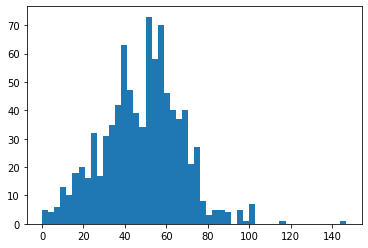

In [10]:
plt.hist([len(s) for s in tokenized], bins=50)
plt.show()

In [14]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized, size = 100, window = 10, min_count = 5, workers = 4, sg = 1)

In [12]:
model.wv.vectors.shape

(926, 100)

In [15]:
print(model.wv.most_similar('아기'))

[('귀여운', 0.8903920650482178), ('연년생', 0.8838666081428528), ('14', 0.874922513961792), ('잘생긴', 0.8588448166847229), ('모델', 0.8580319285392761), ('예쁜', 0.8580145835876465), ('아가', 0.8569360375404358), ('웃', 0.8482080101966858), ('31', 0.8425246477127075), ('베이비', 0.8410151600837708)]


In [16]:
t = '아기'
model.wv.most_similar(t,topn=10)

[('귀여운', 0.8903920650482178),
 ('연년생', 0.8838666081428528),
 ('14', 0.874922513961792),
 ('잘생긴', 0.8588448166847229),
 ('모델', 0.8580319285392761),
 ('예쁜', 0.8580145835876465),
 ('아가', 0.8569360375404358),
 ('웃', 0.8482080101966858),
 ('31', 0.8425246477127075),
 ('베이비', 0.8410151600837708)]

In [17]:
df2 = pd.DataFrame(model.wv.most_similar(t,topn=10), columns = ['Token', 'Similarity'])
alpha = 0.3
df2['transition_probability'] = df2['Similarity'] * alpha
df2

,Token,Similarity,transition_probability
0,귀여운,0.890392,0.267118
1,연년생,0.883867,0.265160
2,14,0.874923,0.262477
3,잘생긴,0.858845,0.257653
4,모델,0.858032,0.257410
5,예쁜,0.858015,0.257404
6,아가,0.856936,0.257081
7,웃,0.848208,0.254462
8,31,0.842525,0.252757
9,베이비,0.841015,0.252305


In [18]:
print(model.wv.most_similar('아들'))

[('래미', 0.9321795701980591), ('딸랑', 0.9241142272949219), ('파파', 0.9114948511123657), ('빠', 0.9100046753883362), ('딸래미', 0.9037197232246399), ('원숭이띠', 0.9023564457893372), ('예진', 0.8983094692230225), ('내사', 0.8967379331588745), ('슈슈', 0.8872296810150146), ('초보', 0.8864464163780212)]


In [19]:
tkn_cnt = 0
t = '아들'
total = len(tokenized)
for i in range(total):
    if t in tokenized[i]:
        tkn_cnt += 1
p_t_curr = tkn_cnt / total

p_next_list = []
exp_cnt = 0
for i in range(total):
    p_list = []
    for j in range(len(tokenized[i])):
        cnt = 0
        
        for k in range(total):
            if t + tokenized[i][j] in hashtag_list[k]:
                cnt += 1
        p_list.append(cnt/total)
    p_next_list.append(p_list)


In [20]:
print(p_next_list[:5])

[[0.0, 0.003393665158371041, 0.0, 0.010180995475113122, 0.010180995475113122, 0.2251131221719457, 0.0, 0.0, 0.0, 0.0, 0.010180995475113122, 0.24321266968325791, 0.013574660633484163, 0.010180995475113122, 0.0011312217194570137, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2251131221719457, 0.0, 0.2251131221719457, 0.0, 0.2251131221719457, 0.0, 0.2251131221719457, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011312217194570137, 0.0, 0.0, 0.010180995475113122, 0.003393665158371041, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007918552036199095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003393665158371041, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2251131221719457, 0.0, 0.0022624434389140274, 0.2251131221719457, 0.0, 0.0, 0.2251131221719457, 0.0, 0.0, 0.0, 0.2251131221719457, 0.0, 0.0, 0.0, 0.0, 0.010180995475113122, 0.0011312217194570137, 0.010180995475113122, 0.0011312217194570137, 0.0, 0.0, 0.010180995475113122], [0.0, 0.

중복 토큰 삭제  
전환, 확장

In [21]:
print(len(tokenized[0]))
print(len(p_next_list[0]))

61
61
